In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [93]:
path = '20250108_NH3/'
file = os.listdir(path)

dfs = []
for f in file[5:81]:
    dfs.append(pd.read_csv(path+f, index_col='Time'))    
df = pd.concat(dfs, ignore_index=True)
print(df.shape)
df.head()

(7626, 2048)


49.750000  50.250000  50.750000  51.250000  51.760000  52.260000  \
0      -40.0      -33.0        3.0       -7.0       12.0       38.0   
1      -31.0      -25.0       15.0        5.0       11.0       29.0   
2      -36.0      -25.0        7.0       10.0       12.0       37.0   
3      -36.0      -23.0       21.0        8.0       16.0       43.0   
4      -33.0      -17.0        4.0        0.0       18.0       35.0   

   52.760000  53.260000  53.760000  54.260000  ...  1186.380000  1186.990000  \
0       -5.0       13.0        4.0      -29.0  ...        -23.0         -5.0   
1      -12.0       13.0       -2.0      -26.0  ...        -18.0         -2.0   
2       -7.0        5.0       -3.0      -21.0  ...        -18.0         12.0   
3       -8.0       -2.0       -4.0      -34.0  ...        -16.0          5.0   
4        6.0        5.0        9.0      -18.0  ...        -14.0         12.0   

   1187.590000  1188.200000  1188.810000  1189.410000  1190.020000  \
0        -24.0          3.0         -6.0         41.0        -14.0   
1        -18.0         11.0         -2.0         55.0         -4.0   
2        -29.0          9.0          5.0         45.0          0.0   
3        -27.0         -1.0          1.0         63.0         -5.0   
4        -15.0         -3.0        -18.0         61.0        -11.0   

   1190.630000  1191.240000  1191.840000  
0        -35.0        -21.0        -15.0  
1        -31.0        -20.0         -2.0  
2        -44.0        -23.0         -3.0  
3        -32.0        -21.0          0.0  
4        -18.0        -25.0         -5.0  

[5 rows x 2048 columns]

In [94]:
def DropFromSecond(x):
    x = x * 10
    x = np.floor(x)
    return x/10

# Given the spectrometer measures 200 - 1100 nn, drop columns outside this range
# df = df[df.columns[296:]]
new_col = [str(DropFromSecond(x)) for x in df.columns.astype(float)]
df.columns = new_col
df.index = [0.5*i for i in range(len(df.index))]
df.head()

49.7  50.2  50.7  51.2  51.7  52.2  52.7  53.2  53.7  54.2  ...  1186.3  \
0.0 -40.0 -33.0   3.0  -7.0  12.0  38.0  -5.0  13.0   4.0 -29.0  ...   -23.0   
0.5 -31.0 -25.0  15.0   5.0  11.0  29.0 -12.0  13.0  -2.0 -26.0  ...   -18.0   
1.0 -36.0 -25.0   7.0  10.0  12.0  37.0  -7.0   5.0  -3.0 -21.0  ...   -18.0   
1.5 -36.0 -23.0  21.0   8.0  16.0  43.0  -8.0  -2.0  -4.0 -34.0  ...   -16.0   
2.0 -33.0 -17.0   4.0   0.0  18.0  35.0   6.0   5.0   9.0 -18.0  ...   -14.0   

     1186.9  1187.5  1188.2  1188.8  1189.4  1190.0  1190.6  1191.2  1191.8  
0.0    -5.0   -24.0     3.0    -6.0    41.0   -14.0   -35.0   -21.0   -15.0  
0.5    -2.0   -18.0    11.0    -2.0    55.0    -4.0   -31.0   -20.0    -2.0  
1.0    12.0   -29.0     9.0     5.0    45.0     0.0   -44.0   -23.0    -3.0  
1.5     5.0   -27.0    -1.0     1.0    63.0    -5.0   -32.0   -21.0     0.0  
2.0    12.0   -15.0    -3.0   -18.0    61.0   -11.0   -18.0   -25.0    -5.0  

[5 rows x 2048 columns]

In [95]:
df = df.iloc[:, np.arange(295,1812,1)] # wavelength range for the spectrometer
df.head()

200.2  200.7  201.2  201.8  202.3  202.8  203.3  203.8  204.3  204.9  \
0.0  -11.0    3.0    1.0  -18.0  -34.0  -13.0   21.0   -4.0   -7.0  -14.0   
0.5   -8.0   10.0    5.0    8.0  -23.0   -7.0    1.0    8.0  -12.0  -19.0   
1.0  -17.0    2.0   14.0   -5.0  -24.0  -23.0    5.0    2.0   -2.0   -5.0   
1.5  -22.0  -24.0    1.0   -7.0  -31.0   -6.0   -4.0   24.0   -1.0  -35.0   
2.0  -25.0   22.0    8.0    1.0  -27.0   -6.0    2.0   -4.0   -5.0  -11.0   

     ...  1044.3  1044.9  1045.5  1046.1  1046.7  1047.3  1047.9  1048.5  \
0.0  ...    48.0    43.0     6.0    57.0    56.0    35.0    45.0     5.0   
0.5  ...    51.0    39.0     3.0    57.0    36.0    34.0    26.0    14.0   
1.0  ...    51.0    29.0    21.0    48.0    65.0    22.0    43.0    32.0   
1.5  ...    32.0    58.0    12.0    43.0    50.0    42.0    38.0    15.0   
2.0  ...    46.0    35.0    27.0    64.0    47.0    31.0    47.0    14.0   

     1049.0  1049.6  
0.0    49.0    31.0  
0.5    48.0    26.0  
1.0    51.0    24.0  
1.5    63.0    35.0  
2.0    57.0    27.0  

[5 rows x 1517 columns]

In [96]:
# absolute
for i in range(len(df.index)):
    for j in range(len(df.columns)):
        if df.iloc[i,j]<0:
            df.iloc[i,j]=0

In [105]:
df_rep = df.corr()
cust_labels = [i for i in range(len(df.columns))]

import seaborn as sns
fig, axs = plt.subplots(figsize=(100,100))
sns.heatmap(df_rep, cmap=plt.cm.PuOr, vmin=0, vmax=1, xticklabels=cust_labels, yticklabels=cust_labels) # annot=True, linewidths=1, fmt='.1f', annot=False, linewidths=1, linecolor='w', cmap=plt.cm.bwr, vmin=-1, vmax=1
axs.set_title('Correlation btw Wavelengths')
plt.show()

fig.savefig('wv_correlation.png', bbox_inches='tight')

In [104]:
df_rep

200.2     200.7     201.2     201.8     202.3     202.8     203.3  \
200.2   1.000000  0.015704 -0.005265  0.038207 -0.003723  0.021186  0.001957   
200.7   0.015704  1.000000  0.037475  0.054571  0.010711  0.069287  0.077787   
201.2  -0.005265  0.037475  1.000000  0.014308  0.017445  0.079168  0.050282   
201.8   0.038207  0.054571  0.014308  1.000000  0.009456  0.048531  0.067643   
202.3  -0.003723  0.010711  0.017445  0.009456  1.000000  0.017597  0.016767   
...          ...       ...       ...       ...       ...       ...       ...   
1047.3  0.003051  0.052720  0.043022  0.038394 -0.012584  0.043362  0.030693   
1047.9  0.004967  0.036908  0.084014  0.044825  0.016062  0.024050  0.057101   
1048.5 -0.000259  0.080282  0.041640  0.053509  0.017969  0.040037  0.054090   
1049.0  0.009154  0.055555  0.065326  0.039793 -0.005376  0.060347  0.037015   
1049.6 -0.002346  0.054758  0.067602  0.053717  0.005778  0.057954  0.039384   

           203.8     204.3     204.9  ...    1044.3    1044.9    1045.5  \
200.2   0.022745  0.017159  0.001958  ...  0.002034 -0.014136 -0.000810   
200.7   0.062276  0.061869  0.043081  ...  0.057819  0.067682  0.065058   
201.2   0.067426  0.066073  0.040265  ...  0.062630  0.075751  0.064957   
201.8   0.069837  0.060266  0.049233  ...  0.040228  0.031848  0.030487   
202.3   0.012673  0.024706  0.075785  ...  0.005303  0.021722  0.007946   
...          ...       ...       ...  ...       ...       ...       ...   
1047.3  0.056107  0.059310  0.045757  ...  0.061857  0.048754  0.101912   
1047.9  0.059849  0.035035  0.036532  ...  0.072111  0.058893  0.053994   
1048.5  0.055505  0.045484  0.034674  ...  0.060602  0.086311  0.061712   
1049.0  0.065979  0.052824  0.042377  ...  0.049042  0.058190  0.062563   
1049.6  0.047993  0.048638  0.043752  ...  0.083321  0.060917  0.027783   

          1046.1    1046.7    1047.3    1047.9    1048.5    1049.0    1049.6  
200.2   0.015425  0.006521  0.003051  0.004967 -0.000259  0.009154 -0.002346  
200.7   0.042086  0.047022  0.052720  0.036908  0.080282  0.055555  0.054758  
201.2   0.062638  0.064457  0.043022  0.084014  0.041640  0.065326  0.067602  
201.8   0.066833  0.042782  0.038394  0.044825  0.053509  0.039793  0.053717  
202.3  -0.011569  0.031946 -0.012584  0.016062  0.017969 -0.005376  0.005778  
...          ...       ...       ...       ...       ...       ...       ...  
1047.3  0.044199 -0.009696  1.000000 -0.002306  0.066584  0.048202  0.049002  
1047.9  0.066220  0.049398 -0.002306  1.000000  0.001178  0.063060  0.083770  
1048.5  0.064218  0.083599  0.066584  0.001178  1.000000  0.025645  0.052226  
1049.0  0.065206  0.067173  0.048202  0.063060  0.025645  1.000000  0.023883  
1049.6  0.077101  0.046063  0.049002  0.083770  0.052226  0.023883  1.000000  

[1517 rows x 1517 columns]

In [6]:
df.agg(['mean', 'var', 'std']).round(1)

49.7  50.2  50.7  51.2  51.7  52.2  52.7  53.2  53.7  54.2  ...  1186.3  \
mean   0.0   0.0  10.2   5.2  13.2  35.2   2.0   2.8   1.6   0.0  ...     0.0   
var    0.0   0.0  50.4  33.0  57.5  56.7  12.5  18.1  10.2   0.0  ...     0.1   
std    0.0   0.1   7.1   5.7   7.6   7.5   3.5   4.3   3.2   0.0  ...     0.3   

      1186.9  1187.5  1188.2  1188.8  1189.4  1190.0  1190.6  1191.2  1191.8  
mean     1.7     0.1     3.9     3.1    48.6     1.2     0.0     0.0     0.8  
var     11.5     0.3    25.8    20.6    70.8     7.7     0.0     0.0     5.3  
std      3.4     0.6     5.1     4.5     8.4     2.8     0.0     0.0     2.3  

[3 rows x 2048 columns]

In [7]:
mean = df.agg(['mean', 'var', 'std']).round(1).iloc[0].values
var = df.agg(['mean', 'var', 'std']).round(1).iloc[1].values
std = df.agg(['mean', 'var', 'std']).round(1).iloc[2].values

In [30]:
# wavelength scaling
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
mm.fit(np.array(df.columns).reshape(-1, 1))
wavelength_scaled = mm.transform(np.array(df.columns).reshape(-1, 1)).flatten() * 1142.08 + 49.75

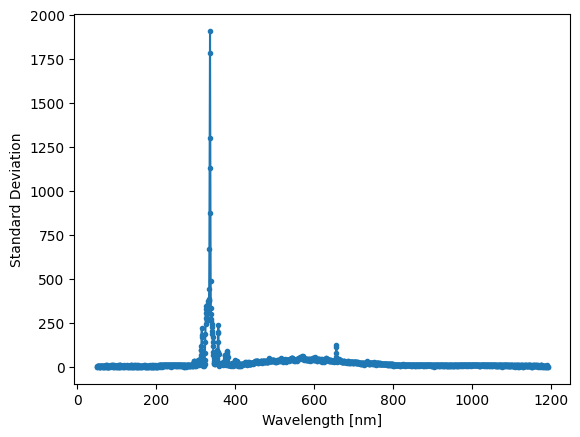

In [33]:
plt.plot(wavelength_scaled, std, '.-')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Standard Deviation')
plt.show()

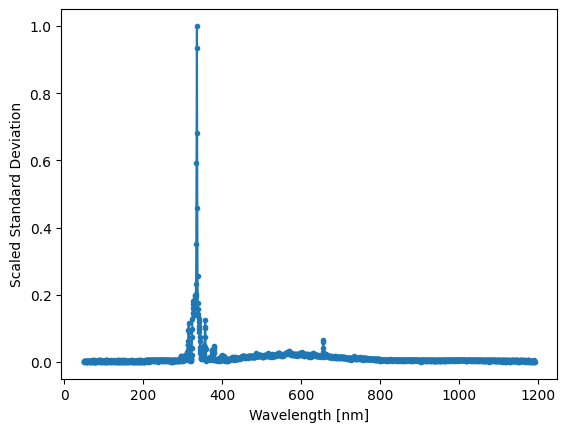

In [34]:
plt.plot(wavelength_scaled, std/max(std), '.-')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Scaled Standard Deviation')
plt.show()

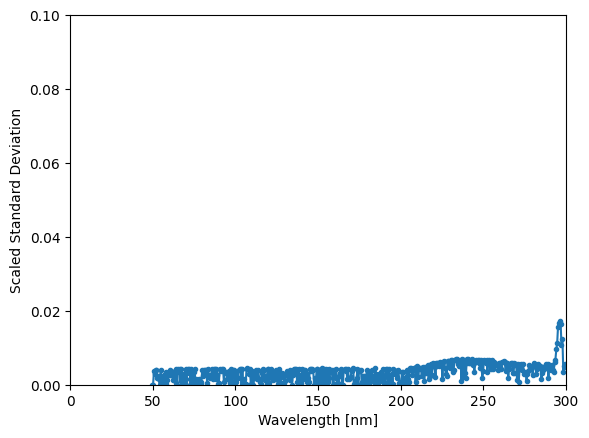

In [98]:
plt.plot(wavelength_scaled, std/max(std), '.-')
plt.xlim(0,300)
plt.ylim(0,0.1)
plt.xlabel('Wavelength [nm]')
plt.ylabel('Scaled Standard Deviation')
plt.show()

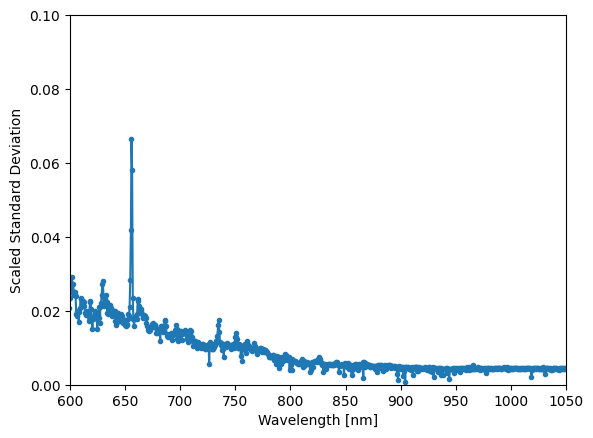

In [53]:
plt.plot(wavelength_scaled, std/max(std), '.-')
plt.xlim(600,1050)
plt.ylim(0,0.1)
plt.xlabel('Wavelength [nm]')
plt.ylabel('Scaled Standard Deviation')
plt.show()

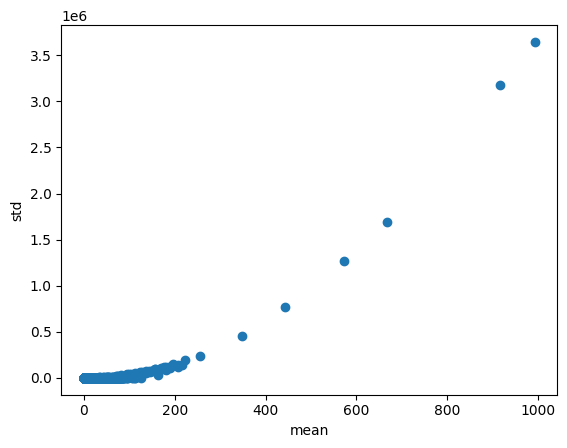

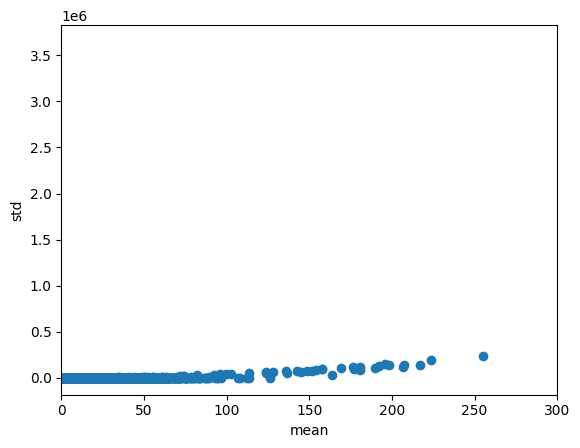

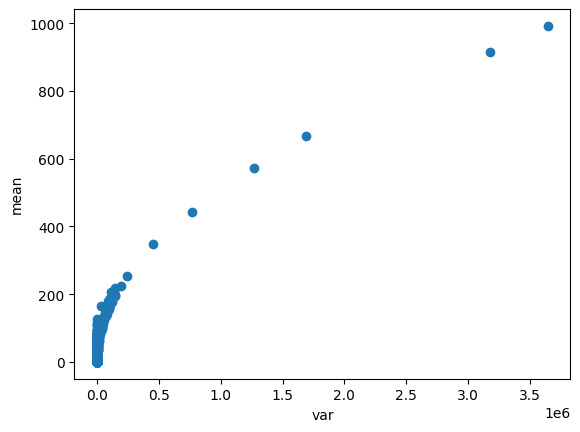

In [13]:
plt.scatter(mean, var)
plt.xlabel('mean')
plt.ylabel('std')
# plt.xlim(0,300)
plt.show()

plt.scatter(mean, var)
plt.xlabel('mean')
plt.ylabel('std')
plt.xlim(0,300)
plt.show()

plt.scatter(var, mean)
plt.xlabel('var')
plt.ylabel('mean')
# plt.xlim(0,300)
plt.show()

In [14]:
# scaling each column and do the same
from sklearn.preprocessing import MinMaxScaler
df_scaled = df.copy()
for i in range(len(df_scaled.columns)):
    mm = MinMaxScaler()
    mm.fit(np.array(df_scaled.iloc[:,i]).reshape(-1, 1))
    df_scaled.iloc[:,i] = mm.transform(np.array(df_scaled.iloc[:,i]).reshape(-1, 1)).flatten()

In [15]:
df_scaled_stat = df_scaled.agg(['mean', 'var', 'std']).round(1)
df_scaled_stat = df_scaled_stat.T
df_scaled_stat

mean  var  std
49.7     0.0  0.0  0.0
50.2     0.0  0.0  0.0
50.7     0.3  0.0  0.2
51.2     0.2  0.0  0.2
51.7     0.3  0.0  0.2
...      ...  ...  ...
1189.4   0.5  0.0  0.1
1190.0   0.1  0.0  0.1
1190.6   0.0  0.0  0.0
1191.2   0.0  0.0  0.0
1191.8   0.0  0.0  0.1

[2048 rows x 3 columns]

In [16]:
mean_scaled = df_scaled.agg(['mean', 'var', 'std']).round(1).iloc[0].values
var_scaled = df_scaled.agg(['mean', 'var', 'std']).round(1).iloc[1].values
std_scaled = df_scaled.agg(['mean', 'var', 'std']).round(1).iloc[2].values

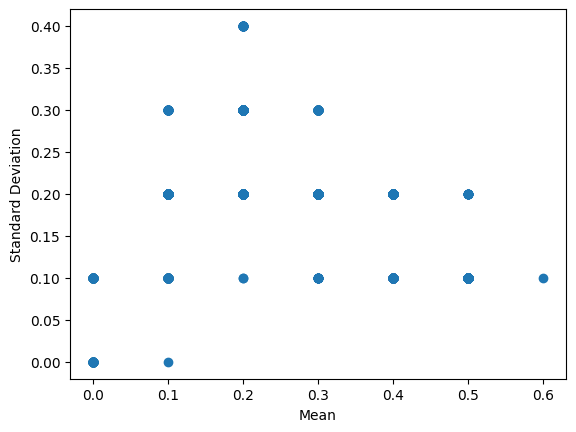

In [28]:
plt.scatter(mean_scaled, std_scaled)
plt.xlabel('Mean')
plt.ylabel('Standard Deviation')
plt.show() # ????

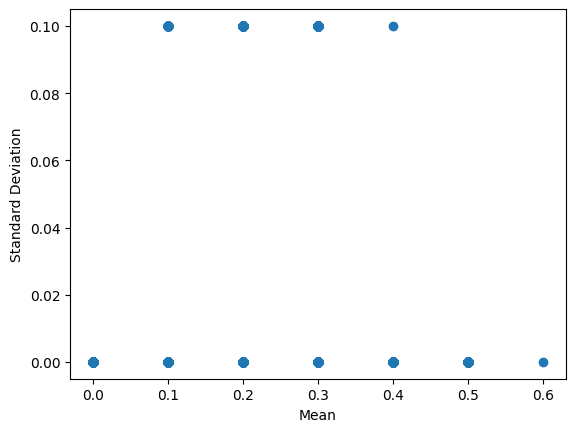

In [27]:
plt.scatter(mean_scaled, var_scaled)
plt.xlabel('Mean')
plt.ylabel('Standard Deviation')
plt.show() # ????

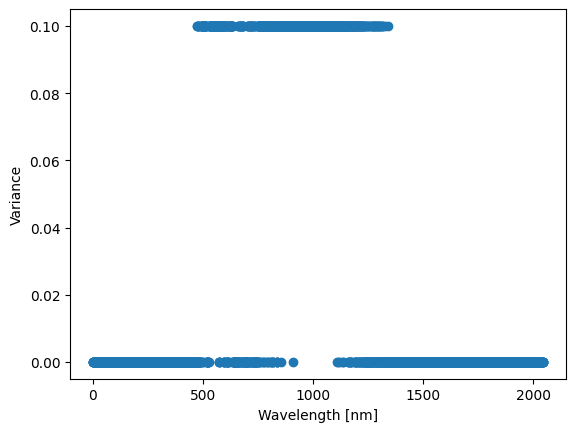

In [25]:
plt.scatter(range(len(var_scaled)), var_scaled)
plt.xlabel('Wavelength [nm]')
plt.ylabel('Variance')
plt.show()

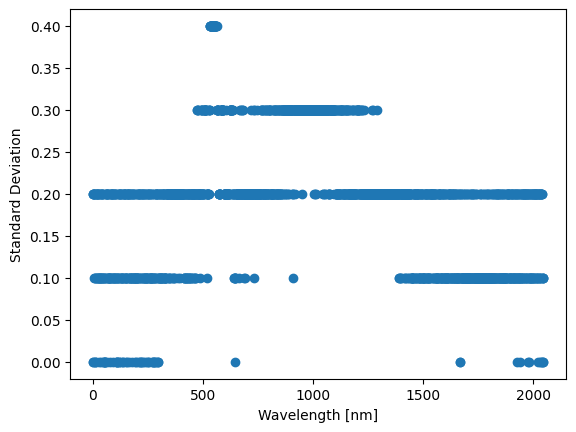

In [26]:
plt.scatter(range(len(var_scaled)), std_scaled)
plt.xlabel('Wavelength [nm]')
plt.ylabel('Standard Deviation')
plt.show()

In [73]:
# PCA to statistical variables
df_scaled.describe().T

count      mean       std  min       25%       50%       75%  max
49.7    7626.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0
50.2    7626.0  0.000310  0.013410  0.0  0.000000  0.000000  0.000000  1.0
50.7    7626.0  0.274952  0.191877  0.0  0.135135  0.270270  0.405405  1.0
51.2    7626.0  0.162085  0.179555  0.0  0.000000  0.093750  0.281250  1.0
51.7    7626.0  0.313345  0.180508  0.0  0.166667  0.309524  0.428571  1.0
...        ...       ...       ...  ...       ...       ...       ...  ...
1189.4  7626.0  0.459824  0.115288  0.0  0.383562  0.465753  0.534247  1.0
1190.0  7626.0  0.054270  0.125845  0.0  0.000000  0.000000  0.000000  1.0
1190.6  7626.0  0.000131  0.011451  0.0  0.000000  0.000000  0.000000  1.0
1191.2  7626.0  0.000393  0.019831  0.0  0.000000  0.000000  0.000000  1.0
1191.8  7626.0  0.029582  0.085007  0.0  0.000000  0.000000  0.000000  1.0

[2048 rows x 8 columns]

In [ ]:
# study correlation between mass = 17, 63, 40, 85, and 28, which represent each category
df_rep = df.corr()
cust_labels = df.columns

import seaborn as sns
import matplotlib.pyplot as plt
fig, axs = plt.subplots()
sns.heatmap(df_rep, annot=True, linewidths=1, cmap=plt.cm.PuOr, vmin=-1, vmax=1, xticklabels=cust_labels, yticklabels=cust_labels, fmt='.1f') # annot=False, linewidths=1, linecolor='w', cmap=plt.cm.bwr, vmin=-1, vmax=1
axs.set_title('Correlation btw Categories')
plt.show()

In [110]:
# df_rep
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
pca.fit(df_rep.values.tolist())
pca.components_.shape

(20, 1517)

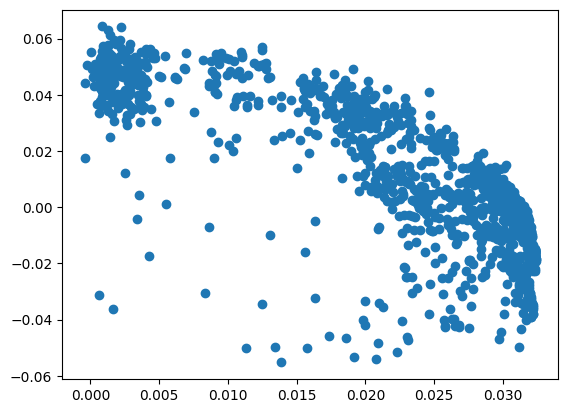

In [111]:
plt.scatter(pca.components_[0], pca.components_[1])
plt.show()

In [112]:
np.sum(pca.explained_variance_ratio_)

0.9974343137046476

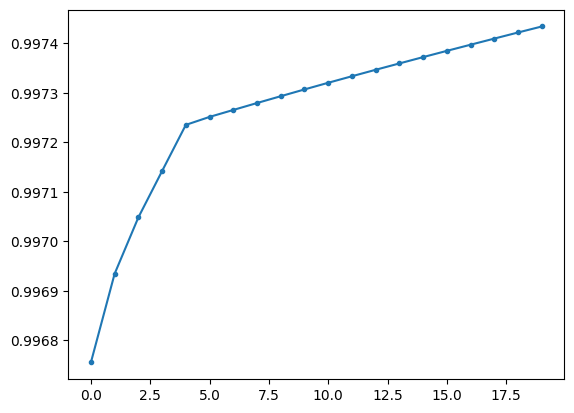

In [115]:
plt.plot(np.cumsum(pca.explained_variance_ratio_),'.-')
plt.show()

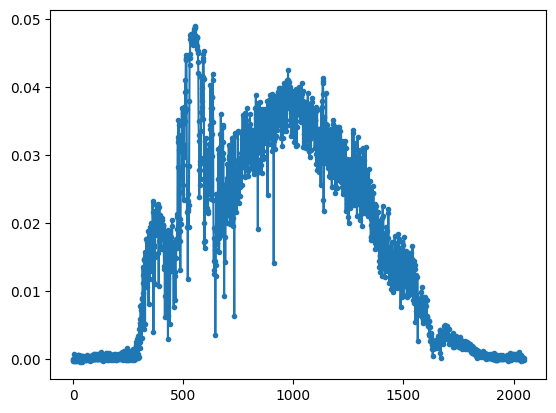

In [87]:
pca = PCA(n_components=2)
pca.fit(df_scaled.values.tolist())
plt.scatter(pca.components_[0], pca.components_[1])
plt.show()

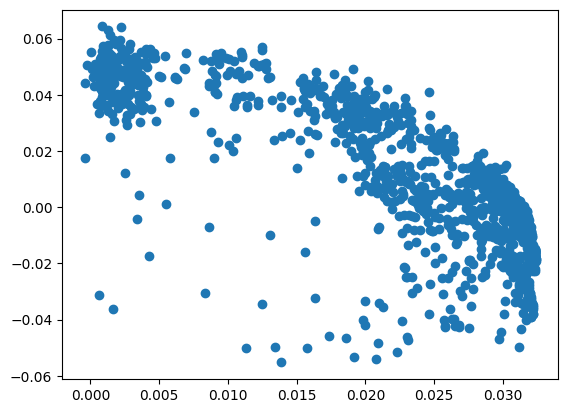

In [116]:
pca = PCA(n_components=2)
pca.fit(df_rep.values.tolist())
plt.scatter(pca.components_[0], pca.components_[1])
plt.show()

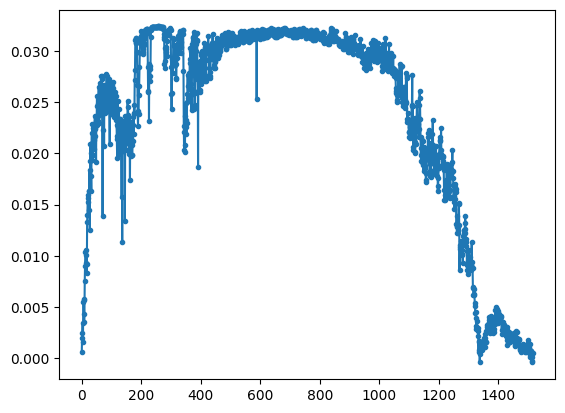

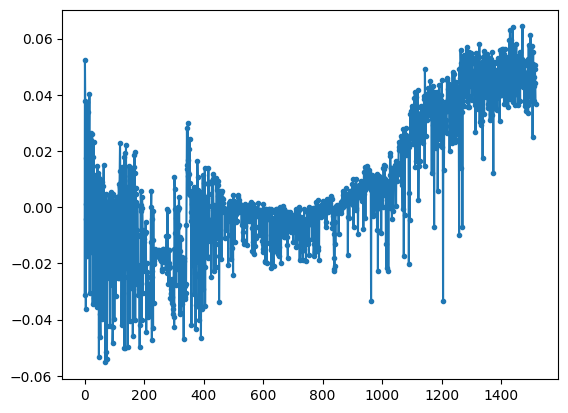

In [119]:
plt.plot(pca.components_[0], '.-')
plt.show()

plt.plot(pca.components_[1], '.-')
plt.show()

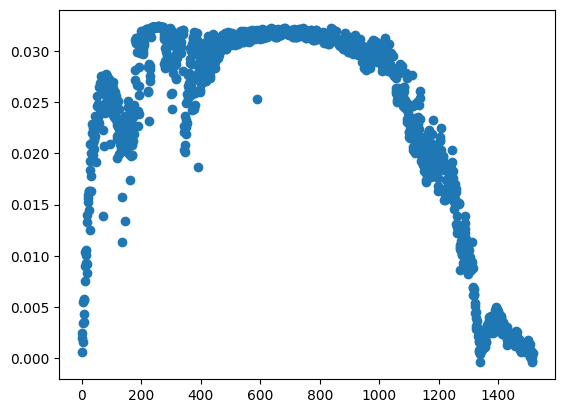

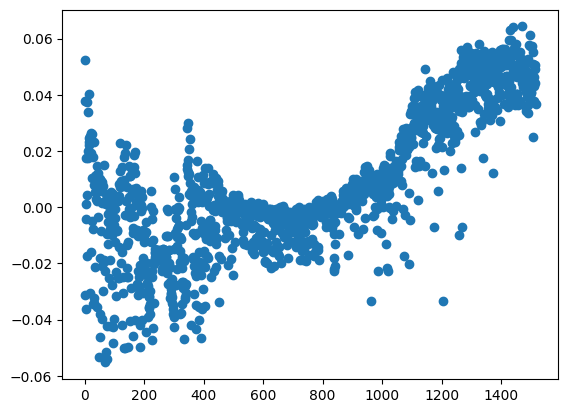

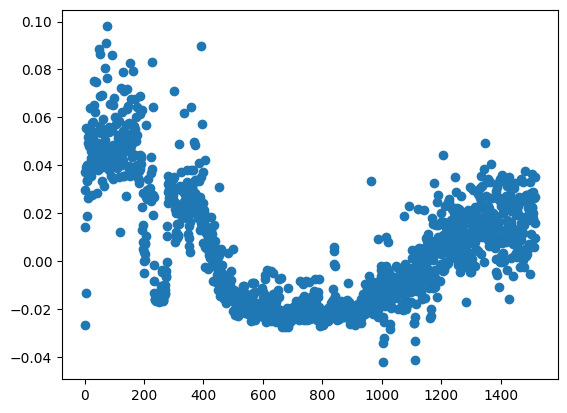

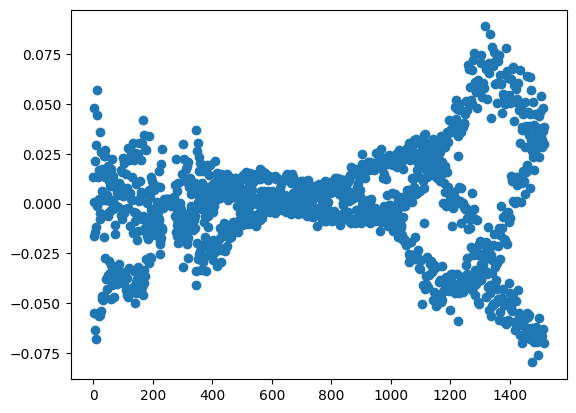

In [122]:
pca = PCA(n_components=4)
pca.fit(df_rep.values.tolist())

for i in range(4):
    plt.scatter(range(len(pca.components_[i])), pca.components_[i])
    plt.show()